/Users/zhihuanwilson/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


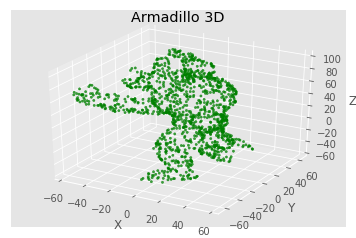

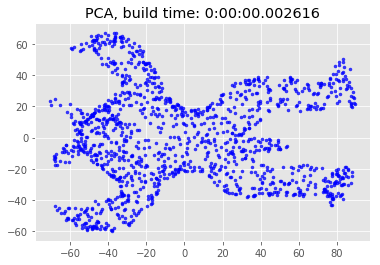

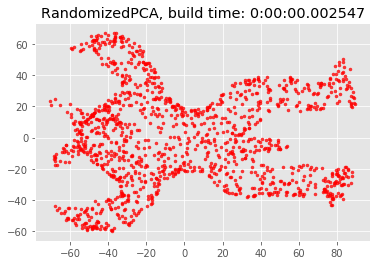

In [6]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import datetime

from mpl_toolkits.mplot3d import Axes3D
from plyfile import PlyData, PlyElement


# Every 100 data samples, we save 1. If things run too slow, try increasing this number. If things run too fast,
# try decreasing it... =)
reduce_factor = 130


# Look pretty...
matplotlib.style.use('ggplot')


# Load up the scanned armadillo
plyfile = PlyData.read('Datasets/stanford_armadillo.ply')
armadillo = pd.DataFrame({
  'x':plyfile['vertex']['z'][::reduce_factor],
  'y':plyfile['vertex']['x'][::reduce_factor],
  'z':plyfile['vertex']['y'][::reduce_factor]
})



def do_PCA(armadillo):
  #
  # TODO: Write code to import the libraries required for PCA. Then, train your PCA on the armadillo dataframe. Finally,
  # drop one dimension (reduce it down to 2D) and project the armadillo down to the 2D principal component feature space.
  #
  # NOTE: Be sure to RETURN your projected armadillo! 
  # (This projection is actually stored in a NumPy NDArray and not a Pandas dataframe, which is something Pandas does for
  # you automatically. =)
  #
  # .. your code here ..
  from sklearn.decomposition import PCA
  pca = PCA(n_components=2)
  pca.fit(armadillo)
  T = pca.transform(armadillo)
  return T


def do_RandomizedPCA(armadillo):
  #
  # TODO: Write code to import the libraries required for RandomizedPCA. Then, train your RandomizedPCA on the armadillo
  # dataframe. Finally, drop one dimension (reduce it down to 2D) and project the armadillo down to the 2D principal component
  # feature space.
  #
  # NOTE: Be sure to RETURN your projected armadillo! 
  # (This projection is actually stored in a NumPy NDArray and not a Pandas dataframe, which is something Pandas does for
  # you automatically. =)
  #
  # .. your code here ..
  from sklearn.decomposition import RandomizedPCA
  rpca = RandomizedPCA(n_components = 2)
  rpca.fit(armadillo)
  R = rpca.transform(armadillo)
  return R



# Render the Original Armadillo
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Armadillo 3D')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter(armadillo.x, armadillo.y, armadillo.z, c='green', marker='.', alpha=0.75)



# Render the newly transformed PCA armadillo!
t1 = datetime.datetime.now()
pca = do_PCA(armadillo)
time_delta = datetime.datetime.now() - t1
if not pca is None:
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.set_title('PCA, build time: ' + str(time_delta))
  ax.scatter(pca[:,0], pca[:,1], c='blue', marker='.', alpha=0.75)



# Render the newly transformed RandomizedPCA armadillo!
t1 = datetime.datetime.now()
rpca = do_RandomizedPCA(armadillo)
time_delta = datetime.datetime.now() - t1
if not rpca is None:
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.set_title('RandomizedPCA, build time: ' + str(time_delta))
  ax.scatter(rpca[:,0], rpca[:,1], c='red', marker='.', alpha=0.75)


plt.show()

